In [4]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Read the dataset insurance.csv
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [19]:
#Check the non-null count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
#Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [21]:
# Use describe to find the statistical summary of each column
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [22]:
# Group the data frame on basis of region
def_region = df.groupby('region')
def_region

In [24]:
# Calculate the mean value of charges as per the region
def_region['expenses'].mean()

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [27]:
# Group the data frame on basis of age
def_age = df.groupby('age').mean
def_age

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001E07F94A420>>

In [28]:
# Find the unique counts of male and female insurance holders
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [29]:
# Encode categorical variables to numerical values. female:0 and male:1 ; non-smoker:0 smoker:1
df['sex'] = df['sex'].apply(lambda x: 0 if x == "female" else 1)
df['smoker'] = df['smoker'].apply(lambda x: 0 if x=='no' else 1)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [30]:
# Display unique region values
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
# create dummy variables for region by droping one region-Northeast
region_encoding = pd.get_dummies(df['region'],drop_first = True)
region_encoding

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [32]:
# Create a new dataframe by concatenating the original data frame with the one having dummy variables for region.
df_new = pd.concat([df,region_encoding],axis=1)
df_new

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,False,False,True
1,18,1,33.8,1,0,southeast,1725.55,False,True,False
2,28,1,33.0,3,0,southeast,4449.46,False,True,False
3,33,1,22.7,0,0,northwest,21984.47,True,False,False
4,32,1,28.9,0,0,northwest,3866.86,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,True,False,False
1334,18,0,31.9,0,0,northeast,2205.98,False,False,False
1335,18,0,36.9,0,0,southeast,1629.83,False,True,False
1336,21,0,25.8,0,0,southwest,2007.95,False,False,True


In [33]:
# Drop the column region, we have dummy variables instead.
df_new.drop(['region'],axis=1,inplace=True)

Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

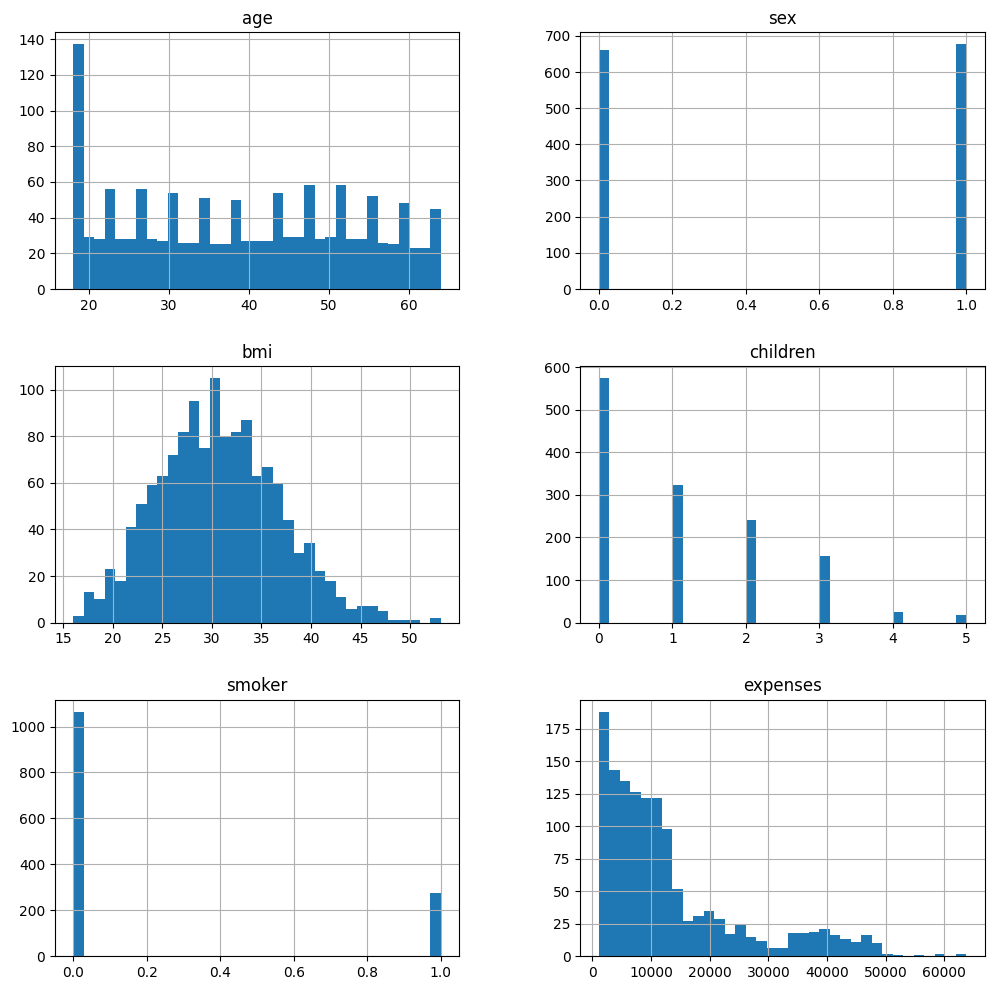

In [35]:
# Create a histogram for numerical variables.
df_new[ ['age','sex','bmi','children','smoker','expenses']] .hist(bins = 35, figsize=(12,12))

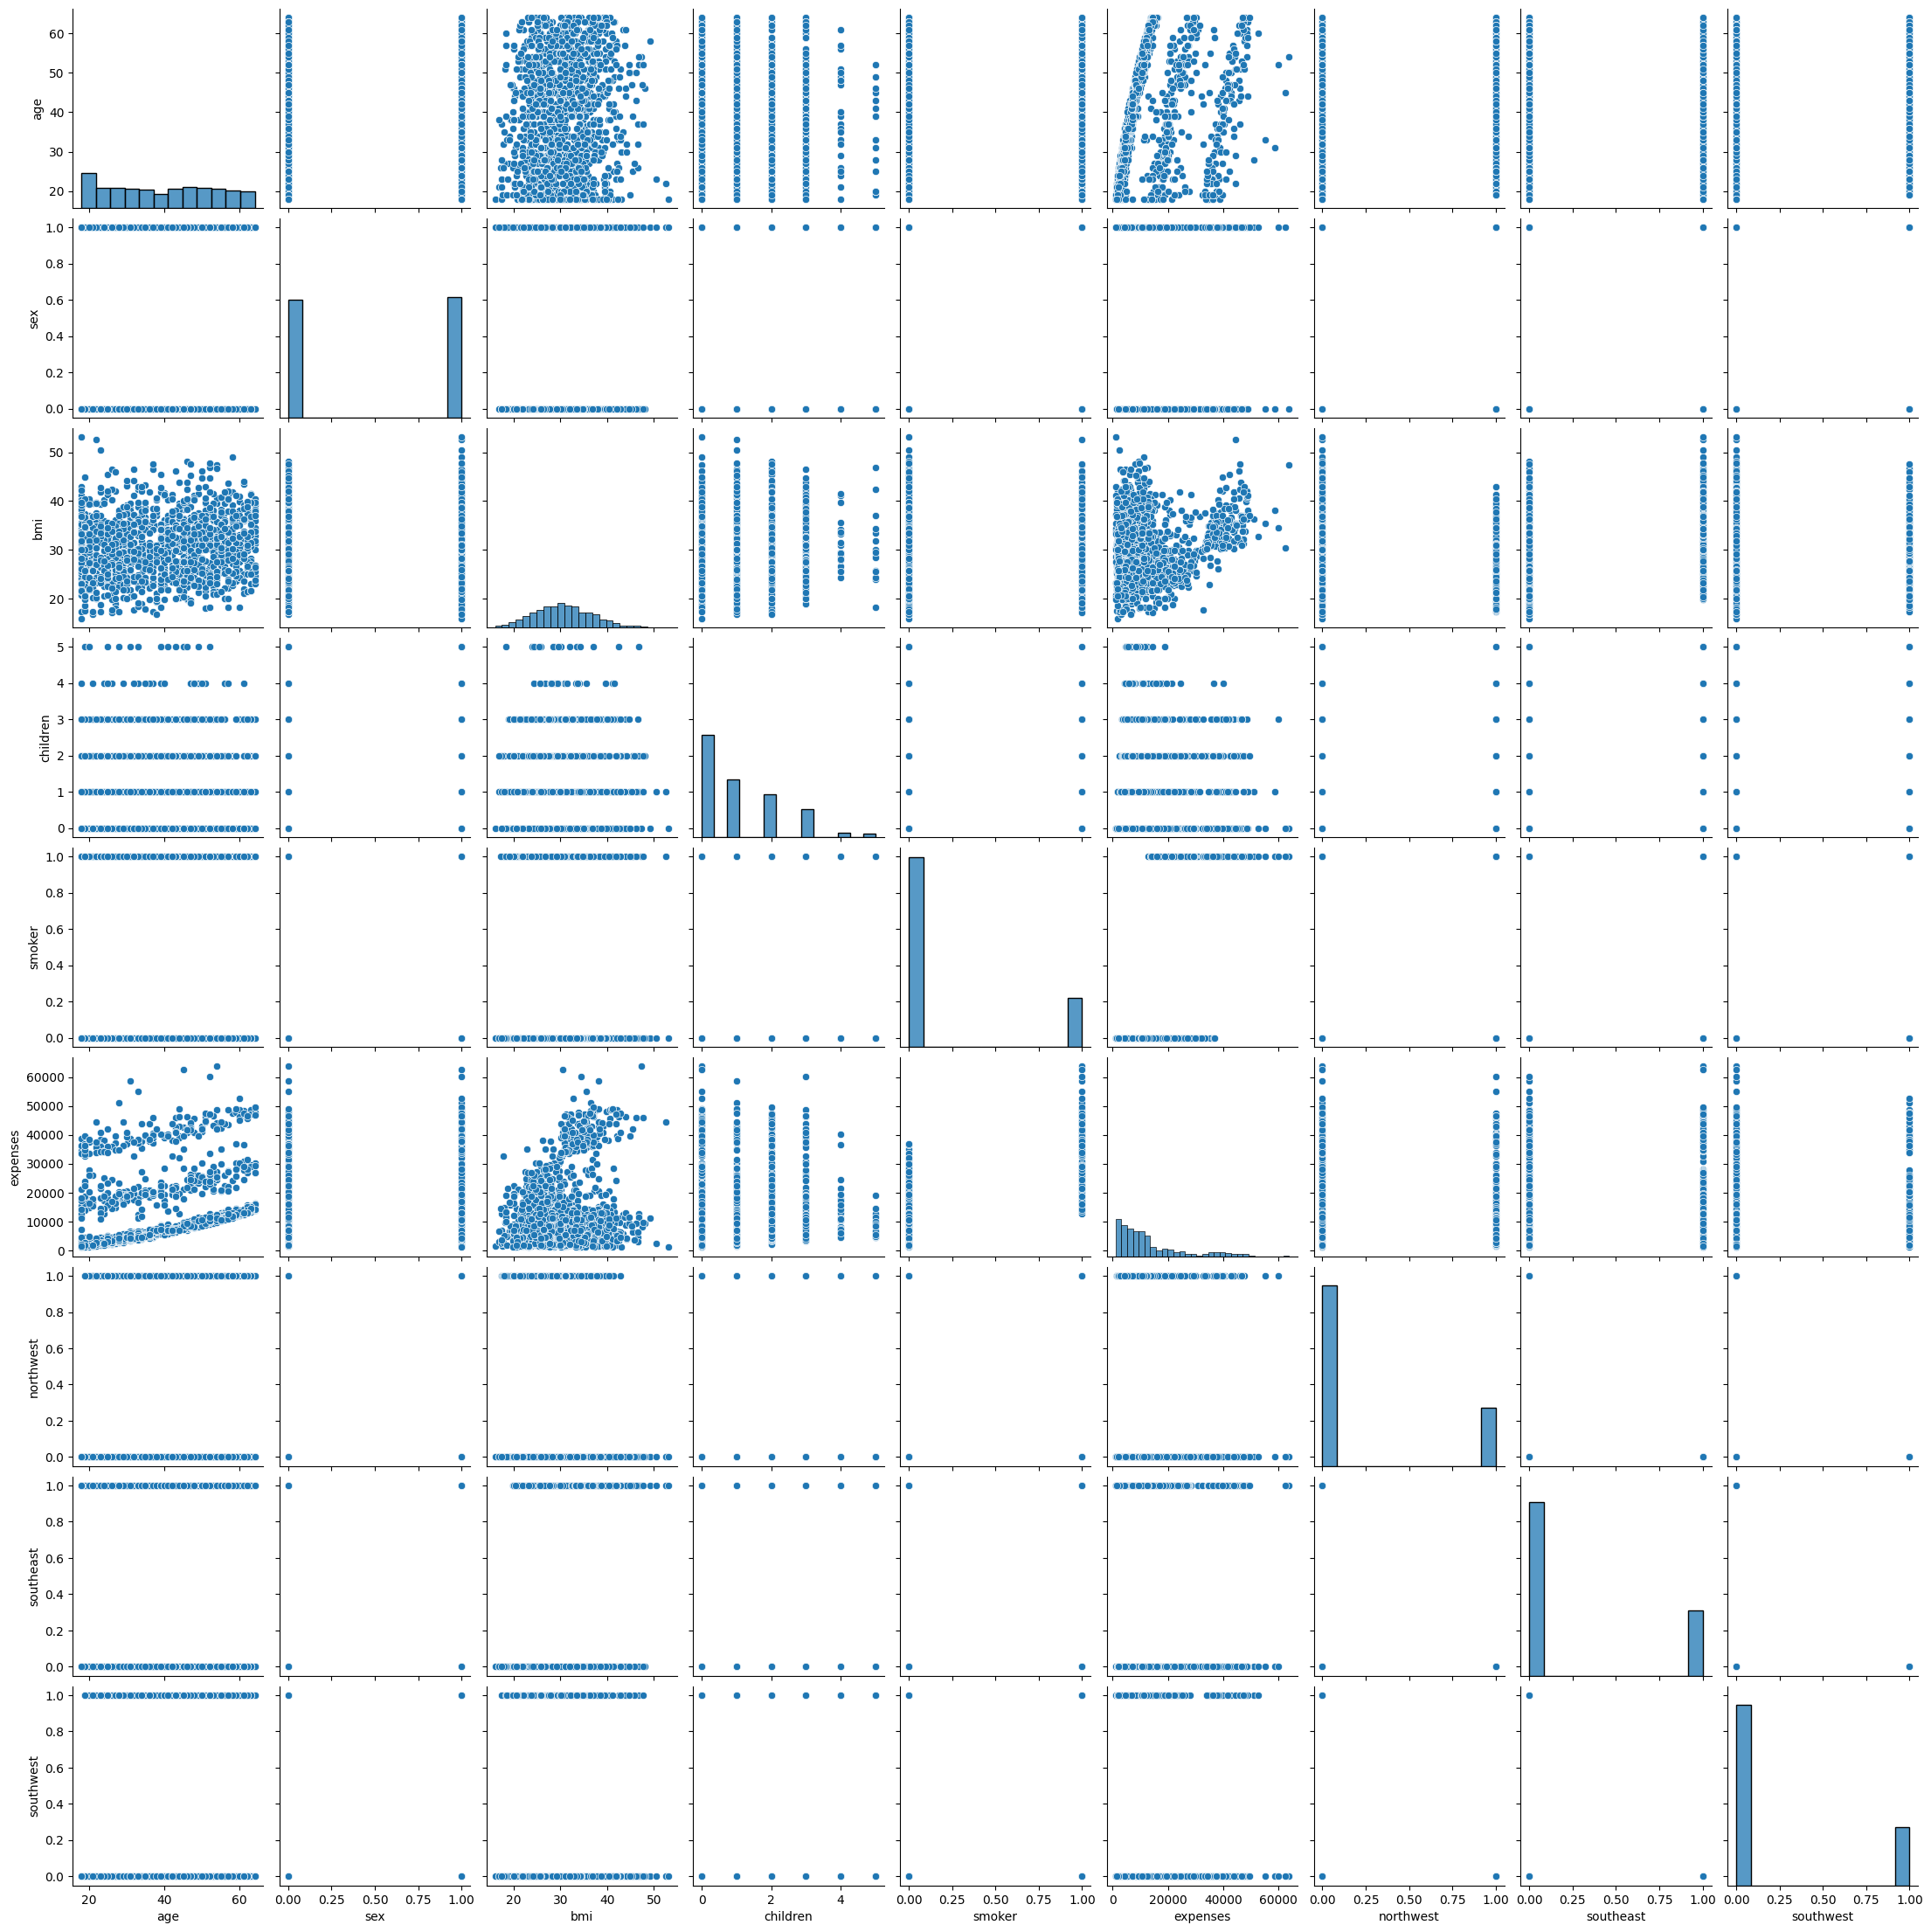

In [36]:
# Create a pairplot between all the variables
sns.pairplot(df_new)

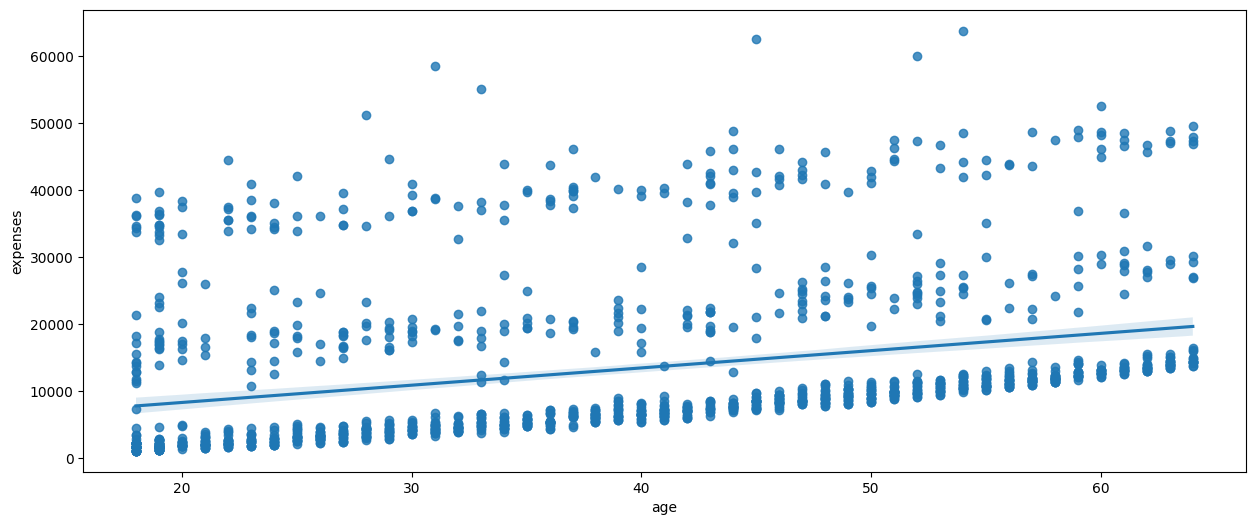

In [38]:
# Create a regression plot on the new dataset between age and charges.
plt.figure(figsize = (15,6))
sns.regplot(x = 'age', y = 'expenses', data = df_new)
plt.show()

<Axes: xlabel='bmi', ylabel='expenses'>

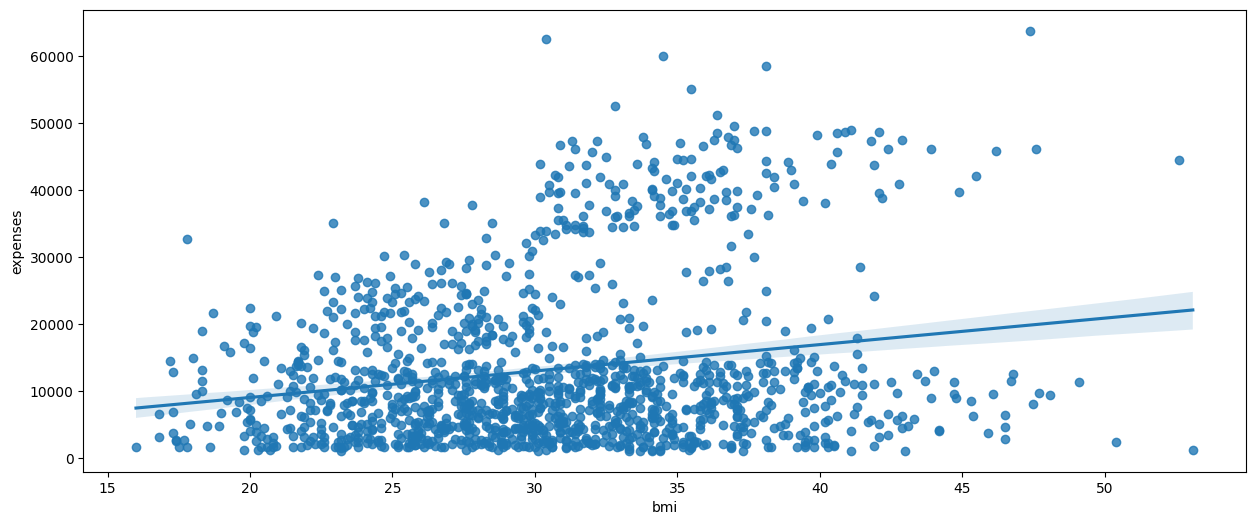

In [40]:
# Create a regression plot on the new dataset between bmi and charges.
plt.figure(figsize = (15,6))
sns.regplot(x = "bmi", y = "expenses", data = df_new)

In [41]:
# Create the correlation matrix between all the variables.
corr_matrix = df_new.corr()
corr_matrix

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

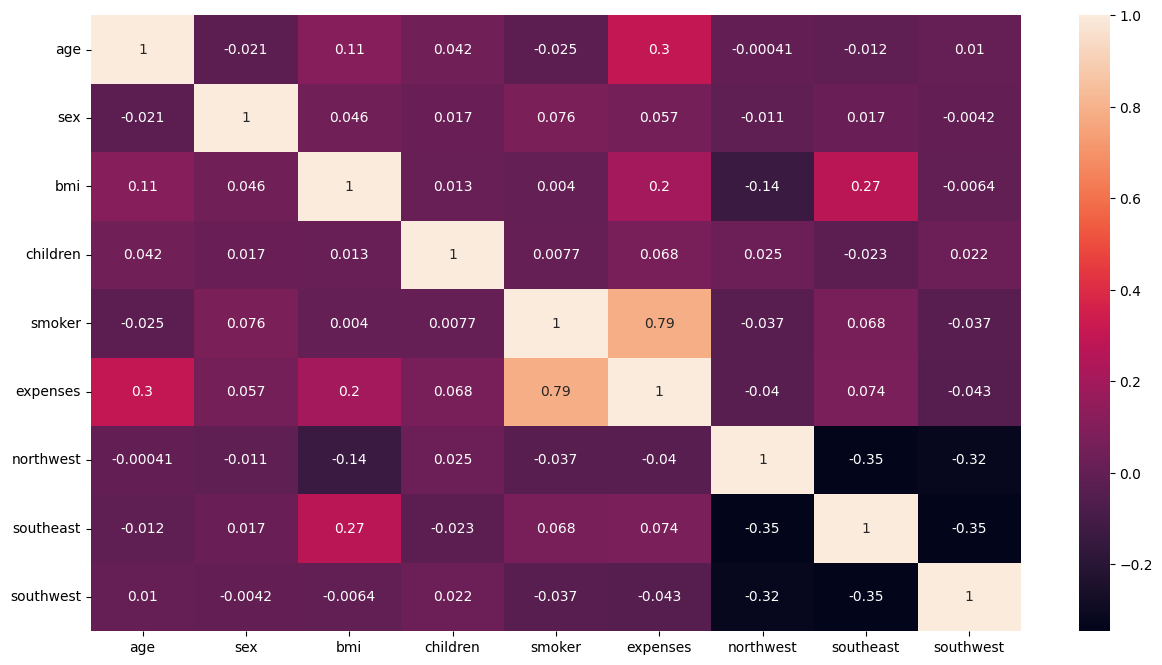

In [42]:
# Create a heat map using the correlation corr_matrix
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot= True)

Modeling

In [44]:
# Divide the variables in target(x) and independent variables (y)
x = df_new.drop(columns=["expenses"])
y = df_new.drop(columns=['age','sex','bmi','children','smoker','northwest','southeast','southwest'])

In [45]:
x.shape

(1338, 8)

In [46]:
# Convert the variables into float 32
X = np.array(x).astype('float32')
Y = np.array(y).astype('float32')

In [47]:
# Reshape the independent variables
Y = Y.reshape(-1,1)
Y

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.95],
       [29141.36]], dtype=float32)

In [48]:
# Scale the values using Standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)

In [49]:
Y

array([[ 0.29858345],
       [-0.95368934],
       [-0.7286749 ],
       ...,
       [-0.96159655],
       [-0.93036115],
       [ 1.3110534 ]], dtype=float32)

In [50]:
# Divide the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=10)

In [51]:
print(X_train.shape)

(1070, 8)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [53]:
# Build a linear regression model.
regression_model_sklearn = LinearRegression() 
regression_model_sklearn.fit(X_train, Y_train)

LinearRegression()

In [54]:
# Check for the accuracy
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test,Y_test)
regression_model_sklearn_accuracy

0.6954555511474609

In [55]:
# Predict using the model on the test dataset
y_predict = regression_model_sklearn.predict(X_test)

In [56]:
# Inverse transform the results so that the predicted value is as required
y_predict_org = scaler_y.inverse_transform(y_predict)
y_test_org = scaler_y.inverse_transform(Y_test)

In [57]:
# Calculate RMSE, MSE, MAE, R-squared
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_org, y_predict_org)),'.3f'))
MSE = mean_squared_error(y_test_org,y_predict_org)
MAE = mean_absolute_error(y_test_org, y_predict_org)
r2 = r2_score(y_test_org,y_predict_org)
print('RSME= ',RMSE,'\nMSE=',MSE, '\nMAE = ',MAE, '\nr2 = ',r2)

RSME=  6535.486 
MSE= 42712572.0 
MAE =  4553.4805 
r2 =  0.6954555511474609


Create a deep learning model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create an ANN with 50 dense layers and ReLu as the activation function
ANN_model = keras.Sequential()
ANN_model.add(Dense(50,input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))

In [ ]:
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
ANN_model.summary()

In [ ]:
ANN_model.compile(optimizer='Adam', loss = 'mean_squared_error')
epochs_hist = ANN_model.fit(X_train,Y_train, epochs = 100, batch_size= 20, validation_split= 0.2)

In [ ]:
# Evaluate the accuracy
result = ANN_model.evaluate(X_test, Y_test)
accuracy_ANN = 1 - result
print("Accuracy : ",accuracy_ANN)

In [ ]:
epochs_hist.history.keys()

In [ ]:
# Create a chart for Model loss prediction 
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title(' Model loss Prediction')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
# Predict the values and create a chart between the actual and the predicted values
y_predict = ANN_model.predict(X_test)
plt.plot(Y_test, y_predict, "^", color='b')
plt.xlabel('Model Prediction')
plt.ylabel('Actual Values')

In [ ]:
# Inverse transform the predicted values
y_predict_org = scaler_y.inverse_transform(y_predict)
y_test_org = scaler_y.inverse_transform(Y_test)

In [ ]:
# create a chart between the transformed vales and the actual values and the actual values
plt.plot(y_predict_org,y_test_org,"^",color= 'b')
plt.xlabel("Model Prediction")
plt.ylabel("Actual Value")

In [ ]:
# Create RMSE, MSE, MAE, R-squared
RMSE = float(format(np.sqrt(mean_squared_error(y_test_org, y_predict_org)),'.3f'))
MSE = mean_squared_error(y_test_org,y_predict_org)
MAE = mean_absolute_error(y_test_org, y_predict_org)
r2 = r2_score(y_test_org,y_predict_org)
print('RSME= ',RMSE,'\nMSE=',MSE, '\nMAE = ',MAE, '\nr2 = ',r2)